In [1]:
import pandas as pd
from dataAnalysis.Constants import FEATURES, SEX_CATEGORY_COLUMN_NAME, FEATURES_IN_TABLE

In [2]:
mimic_sbc = pd.read_csv("hosp_mimic_i.csv")

In [3]:
mimic_sbc = mimic_sbc.dropna(subset=FEATURES_IN_TABLE)

In [4]:
mimic_sbc.loc[:, SEX_CATEGORY_COLUMN_NAME] = mimic_sbc["Sex"] == "W"

In [5]:
mimic_sbc[SEX_CATEGORY_COLUMN_NAME] = mimic_sbc[SEX_CATEGORY_COLUMN_NAME].astype(int)

In [6]:
X = mimic_sbc.loc[:,  FEATURES].values
y = mimic_sbc.loc[:, "Label"].values

In [7]:
X.shape

(1763213, 7)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

In [9]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)

In [10]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_test, X_test, X_test)

/home/dwalke/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [11]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(model, param_grid):
    grid = GridSearchCV(
    n_jobs=-1,
    cv=10,
    estimator=model,
    scoring='roc_auc',
    refit='auroc',
    return_train_score=True,
    param_grid=param_grid,
    verbose= 10
    )
    grid.fit(X_train, y_train)
    return grid.best_estimator_

In [11]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [10, 12, 14],
    'learning_rate': [0.1, .01],
    'gamma': [0],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [counts[0]/ counts[1]],
    "min_child_weight": [2, 5, 7],
    "max_delta_step": [2,4,6],
    'n_estimators': [i for i in range(700, 1500, 100)]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 1,
                                                        seed = 42), param_grid)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
[CV 1/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.4s
[CV 7/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 12/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_we

/home/dwalke/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 9/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  20.5s
[CV 10/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 21/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 22/1296] END gamma=0, learning_

[CV 2/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.1s
[CV 6/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 9/1296] END gamma=0, learning_rate=0.1, 

[CV 6/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.5s
[CV 2/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 8/1296] END gamma=0, learning_rate=0.1,

[CV 6/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.3s
[CV 1/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 10/1296] END gamma=0, learning_rate

[CV 7/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.8s
[CV 10/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 4/10; 12/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 12/1296] END gamma=0, learning_r

[CV 3/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.7s
[CV 8/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 9/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 9/1296] END gamma=0, learning_rate=0

[CV 6/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  20.4s
[CV 7/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 21/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 21/1296] END gamma=0, learning_r

[CV 7/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.4s
[CV 7/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 7/1296] END gamma=0, learning_rate=0.1,

[CV 1/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.2s
[CV 10/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 9/1296] END gamma=0, learning_rate=0.1

[CV 4/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.7s
[CV 5/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 11/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 11/1296] END gamma=0, learning_rate

[CV 1/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  15.4s
[CV 1/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 15/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 15/1296] END gamma=0, learning_r

[CV 9/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.2s
[CV 3/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 8/1296] END gamma=0, learning_rate=0.1,

[CV 1/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  21.2s
[CV 3/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 22/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 22/1296] END gamma=0, learning_rate

[CV 3/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  13.6s
[CV 7/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 13/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 13/1296] END gamma=0, learning_rate

[CV 7/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  20.9s
[CV 4/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 22/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 22/1296] END gamma=0, learning_ra

[CV 2/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  15.7s
[CV 9/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 15/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 16/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 16/1296] END gamma=0, learning_ra

[CV 2/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  18.5s
[CV 4/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 18/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 18/1296] END gamma=0, learning_r

[CV 10/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  18.3s
[CV 3/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 18/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 18/1296] END gamma=0, learni

[CV 5/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 8/10; 110/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 110/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 111/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 111/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 8/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  13.3s
[CV 1/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 13/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 13/1296] END gamma=0, learning_rate

[CV 1/10; 6/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 6/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.8s
[CV 3/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 15/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 15/1296] END gamma=0, learning

[CV 7/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.6s
[CV 8/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 14/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 14/1296] END gamma=0, learning_ra

[CV 8/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.1s
[CV 5/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 9/1296] END gamma=0, learning_rate=0.1, 

[CV 10/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  19.9s
[CV 2/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 21/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 21/1296] END gamma=0, learning

[CV 10/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  21.2s
[CV 7/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 22/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 22/1296] END gamma=0, learning_ra

[CV 10/10; 103/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 3/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 5/10; 6/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 6/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.3s
[CV 7/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 14/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 14/1296] END gamma=0, learning_ra

[CV 7/10; 116/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.6s
[CV 5/10; 123/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 123/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 127/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time

[CV 3/10; 95/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.8s
[CV 7/10; 101/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 101/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 105/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 105/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=

[CV 10/10; 107/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 4/10; 111/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 111/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 112/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 112/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total

[CV 10/10; 94/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.4s
[CV 1/10; 103/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 103/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 106/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time

[CV 8/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.3s
[CV 3/10; 113/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 113/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 7/10; 114/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 114/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 10/10; 100/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 1/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 10/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  18.7s
[CV 10/10; 150/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 150/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 155/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 155/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 9/10; 114/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 5/10; 122/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 122/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 126/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 126/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 1/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.1s
[CV 7/10; 119/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 119/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 119/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 119/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 8/10; 91/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 91/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.2s
[CV 7/10; 108/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 108/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 108/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 108/1296] END gamma=0, le

[CV 1/10; 110/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 110/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.3s
[CV 1/10; 126/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 126/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 128/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 128/1296] END gamma=0, lear

[CV 5/10; 112/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.1s
[CV 3/10; 121/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 121/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 121/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 121/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 4/10; 120/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 5/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 3/10; 131/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 131/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 1/10; 114/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.6s
[CV 4/10; 125/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 125/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 128/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 128/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=

[CV 2/10; 131/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.7s
[CV 3/10; 136/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 136/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 138/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 138/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 4/10; 142/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.2s
[CV 4/10; 149/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 149/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 152/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 152/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 4/10; 116/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.1s
[CV 2/10; 124/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 124/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 127/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 1/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.8s
[CV 7/10; 135/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 135/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 138/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 138/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 7/10; 111/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.0s
[CV 10/10; 123/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 123/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 127/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 9/10; 107/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 107/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  16.6s
[CV 3/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 130/1296] END gamma=0, lea

[CV 7/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.6s
[CV 7/10; 141/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 141/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 143/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 143/1296] END gamma=0, l

[CV 9/10; 225/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 225/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.8s
[CV 2/10; 234/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 234/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 234/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 234/1296] END gamma=0, 

[CV 4/10; 217/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 217/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 217/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 217/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 8/10; 219/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 219/1296] END gamma=0, learnin

[CV 9/10; 179/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.8s
[CV 6/10; 189/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 189/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 189/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 189/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 8/10; 147/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 147/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.3s
[CV 7/10; 167/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 167/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 168/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 168/1296] END gamma=0, le

[CV 3/10; 194/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 194/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 194/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 194/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 2/10; 202/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 202/1296] END gamma=0, learnin

[CV 9/10; 168/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 168/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 3/10; 181/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 181/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 7/10; 181/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 181/1296] END gamma=0, l

[CV 7/10; 248/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 248/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 252/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 252/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 7/10; 263/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 263/1296] END gamma=0, lea

[CV 6/10; 284/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 7/10; 288/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 288/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 290/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 290/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 1/10; 211/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 211/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 214/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 214/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 9/10; 220/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 220/1296] END gamma=0, lear

[CV 6/10; 215/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 215/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 216/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 216/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 1/10; 221/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 221/1296] END gamma=0, le

[CV 9/10; 211/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 211/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 4/10; 225/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 225/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 6/10; 228/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 228/1296] END gamma=0, le

[CV 7/10; 221/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 221/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 225/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 225/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.3s
[CV 8/10; 233/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 233/1296] END gamma=0, learn

[CV 6/10; 220/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 220/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 223/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 223/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 2/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 232/1296] END gamma=0, learnin

[CV 6/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 232/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 232/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.9s
[CV 4/10; 243/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 243/1296] END gamma=0, lea

[CV 1/10; 224/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 224/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 227/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 227/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.4s
[CV 3/10; 236/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 236/1296] END gamma=0, learn

[CV 2/10; 224/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 224/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 227/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 227/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.8s
[CV 4/10; 237/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 237/1296] END gamma=0, lear

[CV 9/10; 236/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 236/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 237/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 237/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 8/10; 246/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 246/1296] END gamma=0, l

[CV 1/10; 239/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 239/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 239/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 239/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 1/10; 249/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 249/1296] END gamma=0, lea

[CV 5/10; 252/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 252/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.3s
[CV 5/10; 265/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 265/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 265/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 265/1296] END gamma=0, lear

[CV 7/10; 332/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 332/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 332/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 7/10; 256/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 256/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 4/10; 238/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 238/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 238/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 238/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.4s
[CV 5/10; 248/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 248/1296] END gamma=0, lear

[CV 3/10; 250/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.2s
[CV 1/10; 260/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 260/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 260/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 260/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 7/10; 251/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.0s
[CV 2/10; 264/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 264/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 264/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 264/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 4/10; 309/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 309/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.5s
[CV 6/10; 319/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 319/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 320/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 320/1296] END gamma=0, lear

[CV 6/10; 285/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 285/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.7s
[CV 2/10; 294/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 294/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 296/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 296/1296] END gamma=0, 

[CV 1/10; 297/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 297/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 8/10; 303/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 303/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 303/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 303/1296] END gamma=0, 

[CV 8/10; 288/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.1s
[CV 9/10; 296/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 296/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 6/10; 300/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 300/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 5/10; 297/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 6/10; 306/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 306/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 10/10; 308/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 308/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 4/10; 336/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 340/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 340/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 8/10; 343/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 343/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=

[CV 6/10; 294/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 294/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.1s
[CV 7/10; 305/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 305/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 307/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 307/1296] END gamma=0, lea

[CV 3/10; 374/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 374/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  11.6s
[CV 10/10; 383/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 383/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 384/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 384/1296] END gamma=0, 

[CV 5/10; 320/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 7/10; 320/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 320/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 10/10; 325/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 325/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 6/10; 318/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 10/10; 318/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 318/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.7s
[CV 2/10; 326/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 326/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 7/10; 381/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 381/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 1/10; 385/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 385/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 387/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 387/1296] END gamma=0, lea

[CV 1/10; 344/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 344/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 344/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.6s
[CV 10/10; 349/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 349/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 4/10; 325/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 327/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 327/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 8/10; 335/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 335/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 8/10; 334/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 337/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 337/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.9s
[CV 4/10; 345/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 345/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time

[CV 2/10; 402/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 402/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  10.7s
[CV 7/10; 312/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 312/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 312/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 8/10; 346/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 347/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 347/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.4s
[CV 3/10; 352/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 352/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 9/10; 339/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 339/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.7s
[CV 9/10; 347/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 347/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 348/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 348/1296] END gamma=0, le

[CV 5/10; 348/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 348/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 348/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 348/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.6s
[CV 6/10; 357/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 357/1296] END gamma=0

[CV 9/10; 393/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 393/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  13.6s
[CV 6/10; 406/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 406/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 408/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 408/1296] END gamma=0, le

[CV 10/10; 418/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 418/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.1s
[CV 6/10; 425/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 425/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 7/10; 427/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 427/1296] END gamma=0, l

[CV 1/10; 349/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 1/10; 355/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 355/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 355/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 355/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 7/10; 424/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 426/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 426/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 10/10; 431/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 431/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 5/10; 383/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.4s
[CV 5/10; 389/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 389/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 391/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 391/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 9/10; 369/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 369/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 2/10; 378/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 378/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 380/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 380/1296] END gamma=0, l

[CV 2/10; 379/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 379/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.6s
[CV 6/10; 386/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 386/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 389/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 389/1296] END gamma=0, learni

[CV 10/10; 392/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 392/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 3/10; 401/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 401/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 401/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 401/1296] END gamma=0, lea

[CV 8/10; 398/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 398/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.6s
[CV 7/10; 402/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 402/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 402/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 402/1296] END gamma=0, 

[CV 10/10; 398/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 398/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.6s
[CV 3/10; 406/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 406/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 5/10; 408/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 408/1296] END gamma=0, 

[CV 2/10; 403/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.8s
[CV 3/10; 410/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 410/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 410/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 410/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 2/10; 409/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 409/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.2s
[CV 2/10; 413/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 413/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 415/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 415/1296] END gamma=0, learning

[CV 2/10; 428/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 428/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 428/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 3/10; 431/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 431/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 10/10; 421/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.2s
[CV 7/10; 428/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 428/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 428/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 428/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 3/10; 427/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 427/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 6/10; 431/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 431/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 433/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 433/1296] END gamma=0, lear

[CV 10/10; 426/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 426/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 5/10; 433/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 433/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 435/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 435/1296] END gamma=0, l

[CV 4/10; 420/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 420/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  10.3s
[CV 1/10; 431/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 431/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 433/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 433/1296] END gamma=0, le

[CV 6/10; 446/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 446/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 446/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 446/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.6s
[CV 2/10; 454/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 454/1296] END gamma=0, lea

[CV 8/10; 441/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 441/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 6/10; 444/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 444/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.2s
[CV 8/10; 447/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 447/1296] END gamma=0, 

[CV 1/10; 444/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 444/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 6/10; 447/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 447/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 447/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 447/1296] END gamma=0

[CV 4/10; 442/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 1/10; 445/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 445/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.1s
[CV 6/10; 448/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 448/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 5/10; 455/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 8/10; 461/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 461/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 461/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 461/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 8/10; 456/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 10/10; 456/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 456/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 4/10; 463/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 463/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total

[CV 4/10; 447/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.3s
[CV 7/10; 453/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 453/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 453/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 453/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 10/10; 462/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.4s
[CV 9/10; 468/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 468/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 469/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 469/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total

[CV 2/10; 470/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.3s
[CV 4/10; 476/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 476/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 476/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 476/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 9/10; 467/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 7/10; 473/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 473/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 474/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 474/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 10/10; 468/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 8/10; 474/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 474/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 474/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 474/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 3/10; 485/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 4/10; 491/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 491/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 491/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 491/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 6/10; 494/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 2/10; 501/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 501/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 501/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 501/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 9/10; 493/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 9/10; 499/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 499/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 500/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 500/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 7/10; 488/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 488/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.2s
[CV 8/10; 494/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 494/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 494/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 494/1296] END gamma=0, learn

[CV 4/10; 499/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.2s
[CV 8/10; 505/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 505/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 506/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 506/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 10/10; 514/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 515/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 515/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.7s
[CV 4/10; 521/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 521/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 9/10; 481/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 3/10; 488/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 488/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 488/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 488/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  

[CV 10/10; 510/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 510/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 511/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 511/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.6s
[CV 3/10; 517/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 517/1296] END gamma=0, lea

[CV 8/10; 517/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 518/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 518/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.2s
[CV 3/10; 524/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 524/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 7/10; 526/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 526/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 526/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 526/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 1/10; 533/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 533/1296] END gamma=0, le

[CV 2/10; 531/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 531/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 531/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 10/10; 536/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 536/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 4/10; 534/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 534/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 534/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 534/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.9s
[CV 5/10; 540/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 540/1296] END gamma=0, le

[CV 4/10; 543/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 543/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 543/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 543/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 6/10; 549/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 549/1296] END gamma=0

[CV 9/10; 540/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 540/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 541/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 541/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.9s
[CV 2/10; 551/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 551/1296] END gamma=0, l

[CV 9/10; 549/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 550/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 550/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.2s
[CV 3/10; 556/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 556/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 10/10; 558/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 558/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 559/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 559/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.0s
[CV 8/10; 569/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 569/1296] END gamma=0, lea

[CV 6/10; 576/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 576/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.2s
[CV 6/10; 582/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 582/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 582/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 582/1296] END gamma=0, l

[CV 5/10; 606/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 606/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 606/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 606/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.6s
[CV 5/10; 611/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 611/1296] END gamma=0, lea

[CV 1/10; 579/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 579/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 579/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 579/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.1s
[CV 4/10; 585/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 585/1296] END gamma=0, lea

[CV 2/10; 621/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 621/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 621/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  10.2s
[CV 3/10; 549/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.4s
[CV 8/10; 559/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.0

[CV 5/10; 572/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 572/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 572/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 572/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.9s
[CV 6/10; 578/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 578/1296] END gamma=0, lear

[CV 8/10; 580/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 581/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 581/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 6/10; 586/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 586/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=

[CV 4/10; 586/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 586/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 586/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.8s
[CV 9/10; 591/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 591/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 8/10; 623/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 623/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 6/10; 626/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 626/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 628/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 628/1296] END gamma=0, learni

[CV 1/10; 590/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 590/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 590/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.0s
[CV 1/10; 595/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 595/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 3/10; 611/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 611/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 611/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.4s
[CV 10/10; 615/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 615/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 5/10; 597/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 597/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 597/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.4s
[CV 7/10; 607/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 607/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 8/10; 591/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 591/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.5s
[CV 5/10; 596/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 596/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 596/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 596/1296] END gamma=0, l

[CV 2/10; 633/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 634/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 634/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.3s
[CV 9/10; 641/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 641/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 10/10; 641/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 641/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.4s
[CV 8/10; 647/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 647/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 648/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 648/1296] END gamma=0, 

[CV 6/10; 620/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 620/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 620/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.3s
[CV 10/10; 624/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 624/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 2/10; 629/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 629/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.3s
[CV 3/10; 637/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 637/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 637/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 637/1296] END gamma=0, learn

[CV 4/10; 634/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 635/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 635/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.4s
[CV 2/10; 641/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 641/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 6/10; 636/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 636/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 7/10; 639/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 639/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 639/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 639/1296] END gamma=0

[CV 5/10; 634/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 635/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 635/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.8s
[CV 2/10; 640/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 640/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 8/10; 646/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 646/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 646/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 1/10; 652/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 652/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 3/10; 636/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 636/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 10/10; 640/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 640/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 642/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 642/1296] END gamma=0

[CV 3/10; 644/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.7s
[CV 6/10; 647/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 647/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 649/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 649/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 8/10; 642/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 644/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 644/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.6s
[CV 9/10; 647/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 647/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 4/10; 653/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 653/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.4s
[CV 4/10; 658/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 658/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 658/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 658/1296] END gamma=0, 

[CV 1/10; 641/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 641/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 3/10; 648/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 648/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 649/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 649/1296] END gamma=0, l

[CV 10/10; 645/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 645/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  11.9s
[CV 4/10; 657/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 657/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 657/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 657/1296] END gamma

[CV 10/10; 664/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 664/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.8s
[CV 2/10; 669/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 669/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 669/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 669/1296] END ga

[CV 7/10; 672/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 672/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 8/10; 676/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 676/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 677/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 677/1296] END gamma=0,

[CV 7/10; 675/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 675/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 8/10; 679/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 679/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 679/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 679/1296] END gamma=0,

[CV 4/10; 680/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 680/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 680/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.6s
[CV 10/10; 688/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 688/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 3/10; 692/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 692/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.1s
[CV 4/10; 696/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 696/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 696/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 696/1296] END gamm

[CV 9/10; 685/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 685/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 6/10; 690/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 690/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 690/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 690/1296] END gamm

[CV 4/10; 690/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 10/10; 694/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 694/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 695/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 695/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 7/10; 699/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 699/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 699/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 699/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 8/10; 704/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 704/1296] END gamma=0,

[CV 7/10; 703/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 10/10; 707/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 707/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 708/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 708/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 10/10; 692/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 692/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 4/10; 697/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 697/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 697/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 697/1296] END gamma=0,

[CV 9/10; 697/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.2s
[CV 9/10; 705/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 705/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 706/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 706/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 1/10; 709/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 6/10; 713/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 713/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 713/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 713/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 4/10; 715/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 715/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 715/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 715/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 9/10; 719/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 719/1296] END gamma=0

[CV 4/10; 223/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 223/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 227/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 227/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.8s
[CV 9/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 232/1296] END gamma=0, learn

[CV 6/10; 721/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 2/10; 726/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 726/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 726/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 726/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 2/10; 751/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 751/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 751/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 9/10; 754/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 754/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 4/10; 752/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 752/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 752/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 752/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.3s
[CV 9/10; 756/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 756/1296] END gamma=0, l

[CV 6/10; 730/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.4s
[CV 10/10; 736/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 736/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 737/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 737/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 3/10; 731/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 731/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.3s
[CV 1/10; 739/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 739/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 739/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 739/1296] END gamma=0

[CV 5/10; 763/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 763/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 763/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 763/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 5/10; 767/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 767/1296] END gamma=0

/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_score

[CV 3/10; 215/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 215/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 215/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 215/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.7s
[CV 4/10; 220/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 220/1296] END gamma=0, lear

[CV 2/10; 748/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 748/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 748/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 748/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 3/10; 752/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 752/1296] END gamma=0, lea

[CV 7/10; 749/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 10/10; 753/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 753/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 754/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 754/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) to

[CV 8/10; 773/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 773/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.3s
[CV 4/10; 782/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 782/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 783/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 783/1296] END gamma=0,

[CV 8/10; 759/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 759/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 760/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 760/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 3/10; 764/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 764/1296] END gamma

[CV 4/10; 764/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 764/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 764/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 764/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 3/10; 768/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 768/1296] END gamma=

[CV 7/10; 765/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 765/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 765/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 9/10; 769/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 769/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 5/10; 782/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 782/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.6s
[CV 5/10; 791/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 791/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 791/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 791/1296] END gamma=0

[CV 5/10; 806/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 806/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 806/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 6/10; 811/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 811/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 9/10; 780/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 780/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 780/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 780/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.2s
[CV 7/10; 783/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 783/1296] END 

[CV 5/10; 779/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 779/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 779/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 779/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 7/10; 782/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 782/1296] END gamma=0

[CV 8/10; 786/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 787/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 787/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 7/10; 790/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 790/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) to

[CV 2/10; 816/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 816/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 816/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 816/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.9s
[CV 5/10; 821/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 821/1296] END gamm

[CV 9/10; 784/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 7/10; 787/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 787/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 788/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 788/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 5/10; 786/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 786/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 3/10; 796/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 796/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 796/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 796/1296] END gamma=0,

[CV 7/10; 810/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 810/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 8/10; 814/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 814/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 815/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 815/1296] END gamma

[CV 5/10; 795/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 795/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 795/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 795/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.4s
[CV 9/10; 801/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 801/1296] END gamma

[CV 1/10; 819/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 819/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 7/10; 823/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 823/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 823/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 823/1296] END gamma=0, l

[CV 3/10; 317/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 317/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.3s
[CV 8/10; 326/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 326/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 10/10; 329/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 329/1296] END gamma=0, lea

[CV 3/10; 847/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 847/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 847/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 4/10; 809/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 809/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 3/10; 833/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 833/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.4s
[CV 5/10; 837/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 837/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 837/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 837/1296] END gamm

[CV 7/10; 835/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.2s
[CV 10/10; 839/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 839/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 840/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 840/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan)

[CV 10/10; 823/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 824/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 824/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.6s
[CV 7/10; 827/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 827/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total

[CV 10/10; 840/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 840/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.1s
[CV 4/10; 850/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 850/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 850/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 850/1296] END gam

[CV 6/10; 836/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 836/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 9/10; 841/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 841/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 842/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 842/1296] END gamma=0, l

[CV 9/10; 836/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.1s
[CV 10/10; 838/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 838/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 839/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 839/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 4/10; 854/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 854/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 7/10; 856/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 856/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 856/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 856/1296] END gamma

[CV 9/10; 832/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 832/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.4s
[CV 1/10; 841/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 841/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 841/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 841/1296] END gamma=0, l

[CV 1/10; 838/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.5s
[CV 6/10; 844/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 844/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 844/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 844/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total

[CV 5/10; 847/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.4s
[CV 10/10; 854/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 854/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 855/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 855/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 5/10; 854/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 8/10; 856/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 856/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 857/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 857/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 6/10; 851/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 851/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.1s
[CV 4/10; 857/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 857/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 857/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 857/1296] END gamma

[CV 9/10; 857/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 857/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 6/10; 863/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 863/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 863/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 863/1296] END gamma

[CV 4/10; 869/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 869/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.6s
[CV 1/10; 871/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 871/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 871/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 871/1296] END gamma=0, lea

[CV 8/10; 854/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 854/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 8/10; 860/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 860/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 860/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 860/1296] END gamma=0

[CV 5/10; 891/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 891/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 3/10; 895/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 895/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 895/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 895/1296] END gamma=0, l

[CV 7/10; 869/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 869/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.1s
[CV 5/10; 878/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 878/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 878/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 878/1296] END gamma=0, 

[CV 9/10; 877/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 877/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.6s
[CV 9/10; 882/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 882/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 883/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 883/1296] END gamma

[CV 8/10; 881/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 881/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.8s
[CV 7/10; 886/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 886/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 887/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 887/1296] END gamma=0

[CV 8/10; 896/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 896/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 897/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 897/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 9/10; 899/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 899/1296] END gamma=0, 

[CV 1/10; 896/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 896/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 2/10; 901/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 901/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 901/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 901/1296] END gamma=0, 

[CV 8/10; 901/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.0s
[CV 8/10; 904/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 904/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 904/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 904/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 6/10; 901/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.9s
[CV 1/10; 904/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 904/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 904/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 904/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 1/10; 906/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 5/10; 909/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 909/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 909/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 909/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan

[CV 4/10; 912/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.0s
[CV 5/10; 915/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 915/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 915/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 915/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) to

[CV 9/10; 916/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 916/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 916/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.4s
[CV 4/10; 919/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 919/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 6/10; 918/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 918/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 10/10; 922/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 922/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 923/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 923/1296] END gamma

[CV 2/10; 917/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 6/10; 919/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 919/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 919/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 919/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 5/10; 935/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 935/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 935/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 935/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.2s
[CV 5/10; 939/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 939/1296] END gamma=0

[CV 3/10; 949/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 949/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 949/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 949/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 4/10; 952/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 952/1296] END gamma=0

[CV 2/10; 940/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 940/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 940/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 940/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.9s
[CV 6/10; 942/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 942/1296] END gamma=0, le

[CV 7/10; 940/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.5s
[CV 2/10; 942/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 942/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 942/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 942/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 4/10; 946/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 946/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 946/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 946/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 4/10; 949/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 949/1296] END gamma=0

[CV 7/10; 952/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 952/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.2s
[CV 5/10; 957/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 957/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 957/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 957/1296] END gamm

[CV 9/10; 950/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 950/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.3s
[CV 4/10; 953/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 953/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 953/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 953/1296] END gamma=0

[CV 7/10; 954/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 954/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 1/10; 958/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 958/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 958/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 958/1296] END gamma

[CV 7/10; 174/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 174/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.6s
[CV 5/10; 187/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 187/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 187/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 187/1296] END gamma=0, lea

[CV 3/10; 984/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 984/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.0s
[CV 8/10; 987/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 987/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 987/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 987/1296] END gam

[CV 2/10; 970/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 970/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 10/10; 973/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 973/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 974/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 974/1296] END gamma

[CV 6/10; 990/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 990/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 10/10; 981/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 981/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.5s
[CV 6/10; 985/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 985/1296] END gamm

[CV 10/10; 974/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 974/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 9/10; 979/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 979/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 980/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 980/1296] END gamma

[CV 10/10; 976/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 976/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.3s
[CV 1/10; 982/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 982/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 982/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 982/1296] END gamma

[CV 3/10; 973/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 973/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 973/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.1s
[CV 3/10; 975/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 975/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_score

[CV 6/10; 236/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 236/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 236/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 236/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.2s
[CV 10/10; 249/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 249/1296] END gamma=0,

[CV 5/10; 998/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 998/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 2/10; 1002/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1002/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 1002/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 1002/1296] END 

[CV 3/10; 993/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 993/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 6/10; 996/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 996/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 996/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 996/1296] END gamm

[CV 6/10; 994/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 994/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 4/10; 999/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 999/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 999/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 999/1296] END ga

[CV 5/10; 1001/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1001/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.4s
[CV 3/10; 1006/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 1006/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1006/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 1006/1296] END g

[CV 1/10; 1005/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1005/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 8/10; 1008/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1008/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 1008/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1008/1296] 

[CV 2/10; 1010/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1010/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.1s
[CV 4/10; 1013/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1013/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 1013/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1013/1296] END gamma=

[CV 4/10; 998/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 998/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 1/10; 1003/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1003/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1003/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1003/1296] END gam

[CV 5/10; 1012/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 1012/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.5s
[CV 1/10; 1015/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1015/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1015/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1015/1296] END gamma=

[CV 2/10; 1006/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1006/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 9/10; 1009/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1009/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 1010/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1010/1296] END gamm

[CV 8/10; 1007/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1007/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 2/10; 1011/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1011/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 1011/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1011/1296] END g

[CV 1/10; 1012/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1012/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.0s
[CV 6/10; 1015/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1015/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 1015/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1015/1296] END gamma=

[CV 3/10; 1024/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 1024/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.2s
[CV 1/10; 1027/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1027/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1027/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1027/1296] END g

[CV 7/10; 1027/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1027/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.6s
[CV 7/10; 1029/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 1029/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 1029/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1029/1296] EN

[CV 9/10; 1029/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1029/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.4s
[CV 8/10; 1033/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1033/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 1033/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1033/1296] END ga

[CV 10/10; 1034/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1034/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.4s
[CV 4/10; 1039/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 1039/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1039/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1039/1296] END gamm

[CV 3/10; 1010/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 1010/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 8/10; 1014/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1014/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 1/10; 1017/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1017/1296] END gam

[CV 8/10; 1028/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1028/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 2/10; 1031/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1031/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1031/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1031/1296] END g

[CV 8/10; 1030/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1030/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.3s
[CV 8/10; 1034/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1034/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 1034/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 1034/1296] END gamm

[CV 6/10; 1013/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1013/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.8s
[CV 7/10; 1018/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1018/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 6/10; 1020/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 1020/1296] END ga

[CV 10/10; 1024/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 1024/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 5/10; 1028/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1028/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 6/10; 1029/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 1029/1296] EN

[CV 7/10; 1051/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1051/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.2s
[CV 2/10; 1055/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1055/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 1055/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 1055/1296] END g

[CV 1/10; 1040/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1040/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 10/10; 1043/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1043/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.0s
[CV 8/10; 1045/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1045/1296] END g

[CV 4/10; 1026/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 1026/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 3/10; 1029/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1029/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.7s
[CV 6/10; 1031/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1031/1296] E

/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_score

[CV 8/10; 1049/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1049/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 2/10; 1053/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1053/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1053/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 1053/1296] EN

[CV 9/10; 1052/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 1052/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.5s
[CV 1/10; 1058/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1058/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1058/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1058/1296] END gamm

[CV 8/10; 1065/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1065/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 9/10; 1070/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 1070/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 1071/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1071/1296] END 

[CV 7/10; 1063/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1063/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.0s
[CV 9/10; 1067/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 1067/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1068/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1068/1296] END ga

[CV 8/10; 1067/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1067/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.3s
[CV 10/10; 1071/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 1071/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1072/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1072/1296] E

[CV 8/10; 1077/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.6s
[CV 1/10; 1081/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1081/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1081/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1081/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 1/10; 1100/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.2s
[CV 8/10; 1102/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1102/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 1102/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 1102/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=n

[CV 3/10; 1095/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 8/10; 1097/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1097/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 1097/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 1097/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=na

[CV 10/10; 1107/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 5/10; 1109/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1109/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1109/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1109/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 7/10; 1109/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 1109/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 4/10; 1111/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 1111/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1111/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1111/1296] END gamma=

[CV 8/10; 1113/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1113/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 7/10; 1115/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 1115/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 1115/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1115/1296] END g

[CV 2/10; 1121/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1121/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.3s
[CV 5/10; 1123/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 1123/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 1123/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1123/1296] END g

[CV 7/10; 1122/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 8/10; 1123/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1123/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 1123/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1123/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=na

[CV 3/10; 1125/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1125/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.5s
[CV 6/10; 1126/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1126/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 1126/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1126/1296] END

[CV 1/10; 1126/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1126/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.1s
[CV 2/10; 1127/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1127/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1127/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1127/1296] END g

[CV 7/10; 1127/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 1127/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 2/10; 1129/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1129/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 1129/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 1129/1296] END gamm

[CV 3/10; 1141/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 4/10; 1142/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1142/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1142/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1142/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan

[CV 5/10; 1141/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 8/10; 1142/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1142/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 1142/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1142/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=n

[CV 9/10; 1143/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1143/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.1s
[CV 1/10; 1145/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1145/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1145/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1145/1296] END

[CV 6/10; 1144/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1144/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 1/10; 1146/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1146/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1146/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1146/1296] EN

[CV 1/10; 1153/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 1/10; 1154/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1154/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 1154/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 1154/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 10/10; 1155/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 1/10; 1157/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1157/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1157/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1157/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 10/10; 1156/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 1/10; 1158/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1158/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1158/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1158/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan

/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_score

[CV 10/10; 1163/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 10/10; 1164/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 1164/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1165/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1165/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, tes

[CV 10/10; 1165/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 10/10; 1166/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1166/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1167/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1167/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, tes

[CV 3/10; 1168/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 3/10; 1169/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 1169/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 1169/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1169/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan

[CV 4/10; 1176/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 5/10; 1177/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 1177/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 1177/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1177/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 4/10; 1178/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 6/10; 1179/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 1179/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 1179/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 1179/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan)

[CV 2/10; 1181/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 4/10; 1182/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 1182/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 1182/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 1182/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan)

[CV 4/10; 1190/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1190/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1190/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1190/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 8/10; 1191/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1191/1296] END 

[CV 4/10; 1191/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 4/10; 1192/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 1192/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1192/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1192/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=na

[CV 4/10; 1194/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 5/10; 1195/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 1195/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 1195/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1195/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=na

[CV 3/10; 1204/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 5/10; 1205/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1205/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1205/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1205/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 10/10; 1204/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 1205/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1205/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 3/10; 1206/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1206/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 1/10; 1194/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 2/10; 1195/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1195/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 3/10; 1196/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 1196/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=na

[CV 8/10; 1216/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1216/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.7s
[CV 10/10; 1217/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1217/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 1218/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1218/1296] EN

[CV 3/10; 1218/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1218/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 3/10; 1219/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 1219/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1219/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 1219/1296] END

[CV 1/10; 290/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 290/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.1s
[CV 8/10; 301/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 301/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 1/10; 306/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 306/1296] END gamma=0, lear

[CV 10/10; 1219/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 1219/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 9/10; 1220/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 1220/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 1220/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1220/1296] E

[CV 1/10; 1229/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 7/10; 1229/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 1229/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 1229/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1229/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tot

[CV 4/10; 1228/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 1228/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.0s
[CV 10/10; 1229/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1229/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1230/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1230/1296] END gam

[CV 4/10; 1229/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1229/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.6s
[CV 1/10; 1231/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1231/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1231/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1231/1296] END gamma=

[CV 2/10; 1218/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.6s
[CV 5/10; 1218/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 1218/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 2/10; 1219/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1219/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=

[CV 7/10; 1234/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1234/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.7s
[CV 4/10; 1236/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 1236/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1236/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 1236/1296] EN

[CV 2/10; 1240/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1240/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.5s
[CV 7/10; 1241/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 1241/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 1241/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 1241/1296] END g

[CV 8/10; 1237/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 1237/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 9/10; 1239/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1239/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 1240/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1240/1296] END

/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/dwalke/.local/lib/python3.10/site-packages/sklearn/metrics/_score

[CV 1/10; 855/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 8/10; 858/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 858/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 859/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 859/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) 

[CV 2/10; 1247/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1247/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 9/10; 1248/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1248/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 1248/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 1248/1296] 

[CV 7/10; 1249/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1249/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.7s
[CV 7/10; 1251/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 1251/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 1251/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1251/1296] END gam

[CV 9/10; 1252/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1252/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 8/10; 1254/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1254/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 1255/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1255/1296] END gamm

[CV 6/10; 1244/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 3/10; 1246/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 1246/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 2/10; 1248/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1248/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=n

[CV 1/10; 1247/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 1247/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.0s
[CV 6/10; 1248/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 1248/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 1248/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 1248/1296] EN

[CV 8/10; 1249/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 1/10; 1251/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1251/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 1/10; 1252/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1252/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 9/10; 1269/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 5/10; 1271/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1271/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 1271/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1271/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=na

[CV 4/10; 1267/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 10/10; 1268/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 1268/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 1269/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1269/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test

[CV 5/10; 1283/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 1283/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.9s
[CV 1/10; 1285/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1285/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1285/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 1285/1296] END g

[CV 3/10; 1285/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 1285/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.5s
[CV 1/10; 1287/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 1287/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 1287/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1287/1296] EN

[CV 7/10; 477/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 9/10; 483/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 483/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 484/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 484/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 6/10; 872/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 872/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 10/10; 877/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 877/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 878/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 878/1296] END gamma=0

[CV 3/10; 1274/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 8/10; 1275/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1275/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 4/10; 1277/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1277/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 5/10; 1294/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 1294/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.6s
[CV 3/10; 1296/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1296/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1296/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 1296/1296] EN

[CV 7/10; 1276/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 2/10; 1278/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 1278/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 9/10; 1279/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1279/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 3/10; 1287/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 1287/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.5s
[CV 2/10; 1289/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 1289/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 1289/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 1289/1296] END

[CV 7/10; 865/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 865/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.4s
[CV 9/10; 874/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 874/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 874/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 874/1296] END gamma=0

[CV 5/10; 857/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 857/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.4s
[CV 2/10; 869/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 869/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=0.892, test=0.808) total time= 9.3min
[CV 1/10; 914/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) to

[CV 7/10; 879/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.0s
[CV 5/10; 883/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 883/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 883/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 883/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) to

[CV 8/10; 312/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 313/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 313/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 9/10; 321/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 321/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 10/10; 900/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.2s
[CV 3/10; 904/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 904/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 904/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 904/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 4/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=0.979, test=0.822) total time= 6.9min
[CV 4/10; 522/1296] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 522/1296] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=1.000, test=0.836) total time=16.3min
[CV 8/10; 985/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 985/1296] END gamma=0,

[CV 1/10; 1080/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 8/10; 1083/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1083/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.9s
[CV 6/10; 1085/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 1085/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan)

[CV 3/10; 1071/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.8s
[CV 3/10; 1073/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 1073/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.9s
[CV 9/10; 1074/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1074/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=

[CV 6/10; 1077/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 7/10; 1079/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 1079/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.7s
[CV 7/10; 1081/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1081/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan)

[CV 5/10; 1105/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.7s
[CV 6/10; 1107/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 1107/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.6s
[CV 7/10; 1108/1296] START gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 1108/1296] END gamma=0, learning_rate=0.01, max_delta_step=6, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) t

[CV 9/10; 912/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 912/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.9s
[CV 10/10; 919/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 919/1296] END gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   1.4s
[CV 8/10; 921/1296] START gamma=0, learning_rate=0.01, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 921/1296] END gamma

[CV 5/10; 828/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 828/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.5s
[CV 8/10; 837/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 837/1296] END gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   2.8s
[CV 3/10; 842/1296] START gamma=0, learning_rate=0.01, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 842/1296] END gamm

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
counts[0]/ counts[1]

27.02999098372325

In [18]:
from xgboost import XGBClassifier
import numpy as np
param_grid = {
    'max_depth': [10],
    'learning_rate': [0.1],
    'gamma': [0],
    'reg_lambda': [0],
    'scale_pos_weight': np.linspace(0.5, 5.5, num=10),
    "min_child_weight": [2],
    "max_delta_step": [2],
    'n_estimators': [700]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 1,
                                                        seed = 42), param_grid)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 9/10; 4/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=2.166666666666667
[CV 9/10; 4/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=2.166666666666667;, score=(train=0.975, test=0.835) total time= 7.8min
[CV 10/10; 3/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=1.6111111111111112
[CV 10/10; 3/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=1.6111111111111112;, score=(train=0.971, test=0.828) total time= 7.8min
[CV 6/10; 3/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=1.61

[CV 5/10; 6/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.2777777777777777
[CV 5/10; 6/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.2777777777777777;, score=(train=0.980, test=0.829) total time= 7.8min
[CV 2/10; 5/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=2.7222222222222223
[CV 2/10; 5/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=2.7222222222222223;, score=(train=0.979, test=0.831) total time= 7.8min
[CV 4/10; 6/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.2777777777777777
[CV 4/10; 6/10] END gamma=0, learning_rate=0.1, 

In [19]:
xgb_classifier.scale_pos_weight

1.6111111111111112

[CV 1/10; 2/11] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=10
[CV 1/10; 2/11] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=10;, score=(train=0.981, test=0.831) total time=  59.2s
[CV 4/10; 1/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5
[CV 4/10; 1/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5;, score=(train=0.945, test=0.838) total time= 5.9min
[CV 6/10; 7/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.8333333333333335
[CV 6/10; 7/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimato

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC    AUPRC
0     Leipzig  0.246915  0.966327  0.570146   0.157472  0.837476  0.28671
1  Greifswald  0.246915  0.966327  0.570146   0.157472  0.837476  0.28671


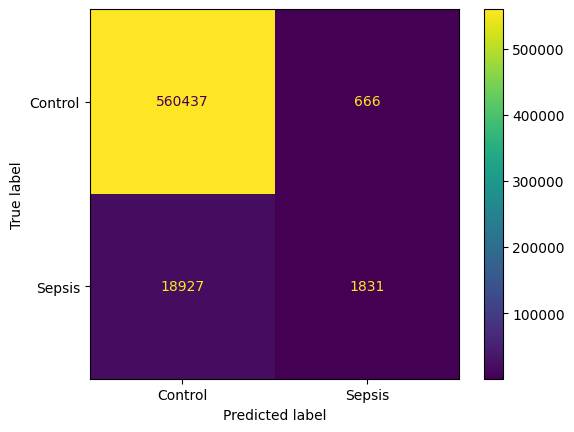

[CV 10/10; 1/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5
[CV 10/10; 1/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5;, score=(train=0.946, test=0.825) total time= 7.2min
[CV 10/10; 7/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.8333333333333335
[CV 10/10; 7/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.8333333333333335;, score=(train=0.982, test=0.826) total time=  32.8s
[CV 7/10; 1/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5
[CV 7/10; 1/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child

[CV 3/10; 3/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=1.6111111111111112
[CV 3/10; 3/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=1.6111111111111112;, score=(train=0.972, test=0.831) total time= 7.7min
[CV 10/10; 9/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=4.944444444444445
[CV 10/10; 9/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=4.944444444444445;, score=(train=0.982, test=0.824) total time= 3.1min
[CV 8/10; 4/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=2.166666666666667
[CV 8/10; 4/10] END gamma=0, learning_rate=0.1, m

[CV 4/10; 1/11] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=5
[CV 4/10; 1/11] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=5;, score=(train=0.982, test=0.836) total time=  54.8s
[CV 1/10; 1/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5
[CV 1/10; 1/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=0.5;, score=(train=0.945, test=0.837) total time= 4.2min
[CV 5/10; 7/10] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=3.8333333333333335
[CV 5/10; 7/10] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators

In [21]:
from xgboost import XGBClassifier
xgb_classifier_model = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 1.611,#counts[0]/ counts[1]
                           n_estimators=700,
                           max_depth=10,
                           eta=0.1,
                                     gamma=0,
                                     reg_lambda=0,
                           min_child_weight = 2,
                           max_delta_step= 2,
                           sampling_method= "uniform")
xgb_classifier_model.fit(X_train, y_train)
print(evaluation.get_df_metrics(xgb_classifier_model))
evaluation.plot_confusion_matrix(xgb_classifier_model)

In [11]:
import torch
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

X_train, X_val, y_train, y_val = train_test_split(
     X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train= torch.from_numpy(X_train).type(torch.float)
X_val= torch.from_numpy(X_val).type(torch.float)
X_test= torch.from_numpy(X_test).type(torch.float)
y_train= torch.from_numpy(y_train).type(torch.float)
y_val= torch.from_numpy(y_val).type(torch.float)
y_test= torch.from_numpy(y_test).type(torch.float)

X_train = X_train.to(device)
y_train = y_train.to(device)

X_val = X_val.to(device)
y_val = y_val.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

WEIGHT = torch.tensor([counts[0]/ counts[1]])
WEIGHT = WEIGHT.to(device)

print("Data shifted to the device " + str(device))

Data shifted to the device cuda:0


In [12]:
import torch.nn.functional as F
from torch.nn import Linear
import torch
from dataAnalysis.Constants import FEATURES

class NeuralNetwork(torch.nn.Module):

    def __init__(self, hidden_dim = 128, out_channels = 1):
        super(NeuralNetwork, self).__init__()
        
        input_dim = len(FEATURES)
        self.lin_0 = Linear(input_dim, hidden_dim)
        self.lin_1 = Linear(input_dim, hidden_dim)
        self.lin_end_0 = Linear(hidden_dim, out_channels)
        self.lin_end_1 = Linear(hidden_dim, out_channels)
        self.batchnorm_1 = torch.nn.BatchNorm1d(hidden_dim)

    def forward(self, x):
        x = self.lin_0(x) + self.lin_1(x)
#         x = F.normalize(x, p=2., dim=-1)
        x = torch.relu(x)
#         x= self.batchnorm_1(x)
        x = self.lin_end_0(x) + self.lin_end_1(x) 
        return x
            
    def predict_proba(self, x):
        with torch.inference_mode():
            self.eval()
            logits = self.forward(x)
            scores = torch.sigmoid(torch.squeeze(logits))
            scores = torch.unsqueeze(scores, 0)
            proba_predict = torch.concat((1- scores, scores), dim = 0)
            return torch.transpose(proba_predict, 0, 1)
            
    def predict(self, x):
        return torch.round(self.predict_proba(x)[:, 1])

In [13]:
X_train.shape

torch.Size([945081, 7])

In [14]:
torch.isnan(X_train).sum()

tensor(0, device='cuda:0')

In [15]:
import torch 

class ModelWrapper():
    def __init__(self):
        self.LEARNING_RATE = 3e-4
        self.MAX_EPOCHS = 10000

        self.model = NeuralNetwork(hidden_dim = 128, out_channels=1) 
        self.model = self.model.to(device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.LEARNING_RATE,betas=(0.9, 0.999), eps=1e-08)
        
        self.last_loss = 0
        self.increased_loss = 0
        self.BREAKING_THRESHOLD = 5      
    
    def validate(self):
        with torch.inference_mode():
            self.model.eval()
            out = self.model(X_val)
            loss = F.binary_cross_entropy_with_logits(torch.squeeze(out), y_val.type(torch.float32),
                                                      pos_weight=WEIGHT)
            
            if loss.item() > self.last_loss:
                self.increased_loss += 1
            else:
                self.increased_loss = 0
            self.last_loss = loss.item()
            
            

    def train(self):
        global y_test, X_test
        for epoch in range(self.MAX_EPOCHS):
#             print(epoch)
            self.model.train()
            self.optimizer.zero_grad()
            out = self.model(X_train)
            loss = F.binary_cross_entropy_with_logits(torch.squeeze(out), y_train.type(torch.float32),
                                                      pos_weight=WEIGHT)
            print(loss)
            loss.backward()
            self.optimizer.step()
            self.validate() 

            if self.increased_loss >= self.BREAKING_THRESHOLD:
                print(f"Breaked at {str(epoch)}")
                break
            if epoch % 3 == 0:
                model = self.get_model()
                y_test = y_test.cpu()
                X_test = X_test.cpu()
                model = model.cpu()
                from dataAnalysis.Metrics import Evaluation

                evaluation = Evaluation(y_test, y_test, X_test, X_test)
                print(evaluation.get_df_metrics(model))
                evaluation.plot_confusion_matrix(model)
                model = model.to(device)
            
    def get_model(self):
        return self.model    

tensor(18.6185, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.032508  0.859635  0.502042   0.080062  0.527152  0.043243
1  Greifswald  0.032508  0.859635  0.502042   0.080062  0.527152  0.043243
tensor(16.8962, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(15.2146, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(13.5856, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.035204  0.804565  0.486724   0.082817  0.529072  0.044023
1  Greifswald  0.035204  0.804565  0.486724   0.082817  0.529072  0.044023
tensor(12.0275, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(10.5583, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(9.1892, d

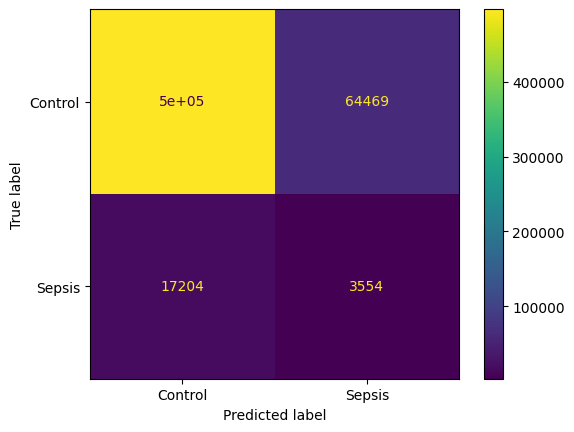

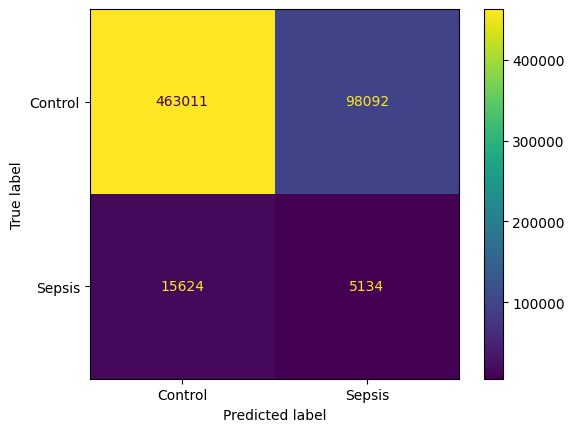

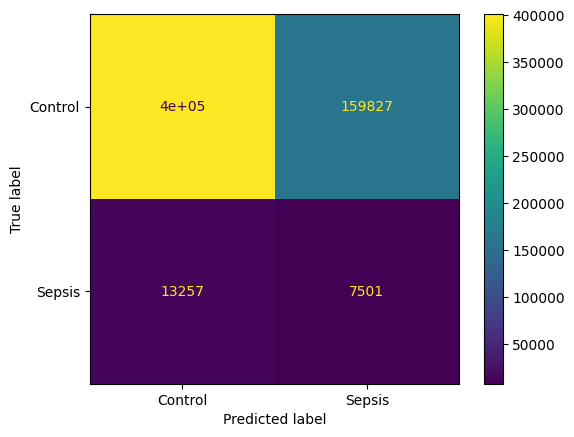

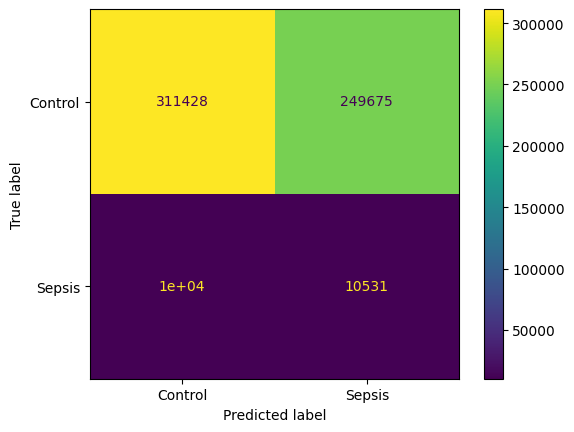

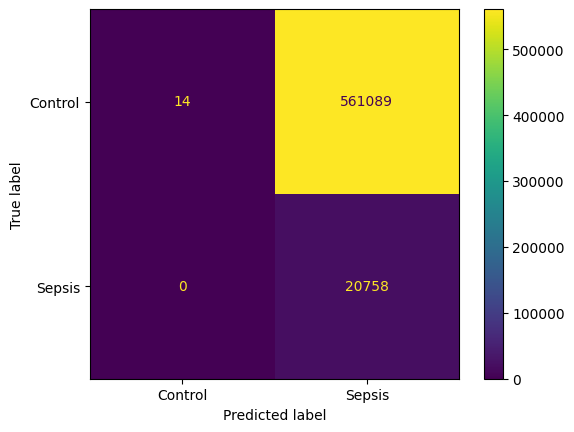

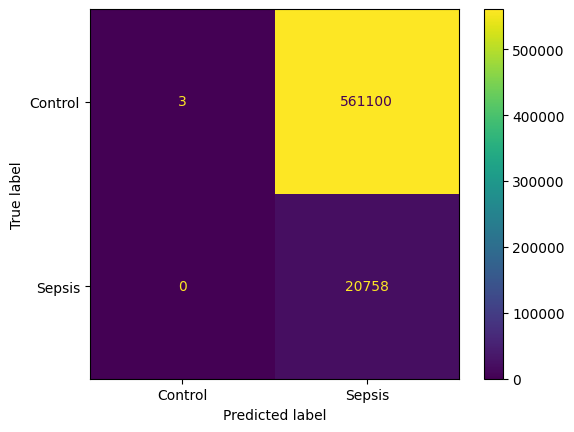

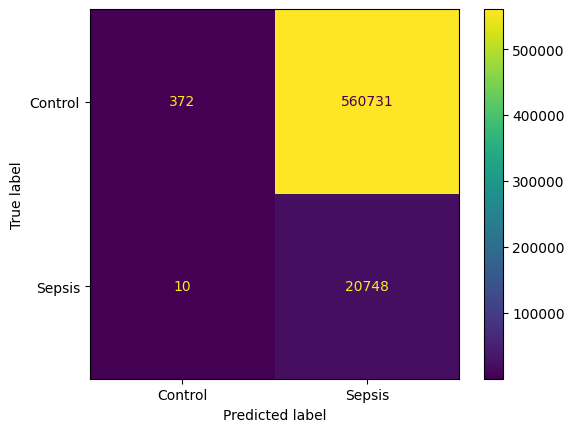

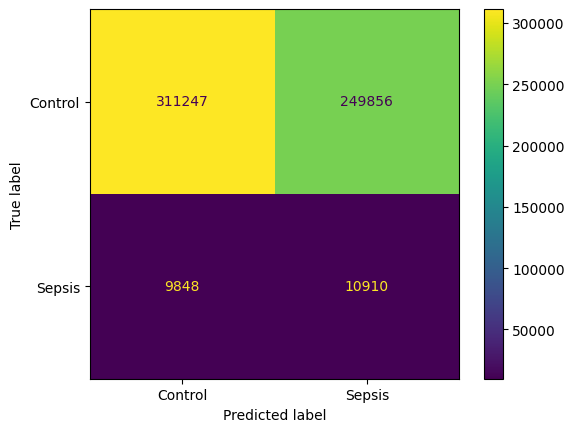

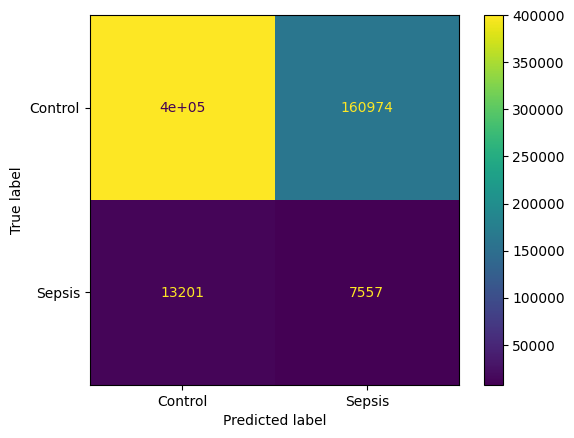

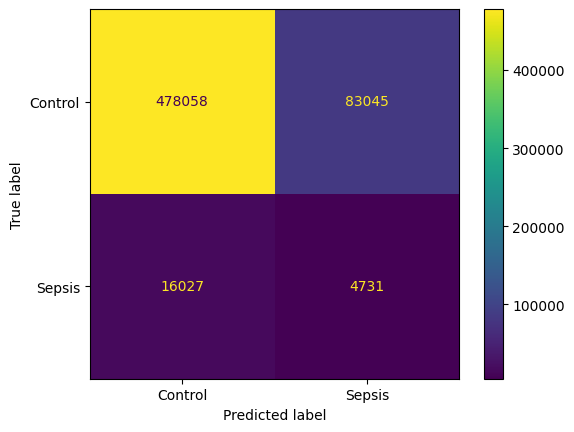

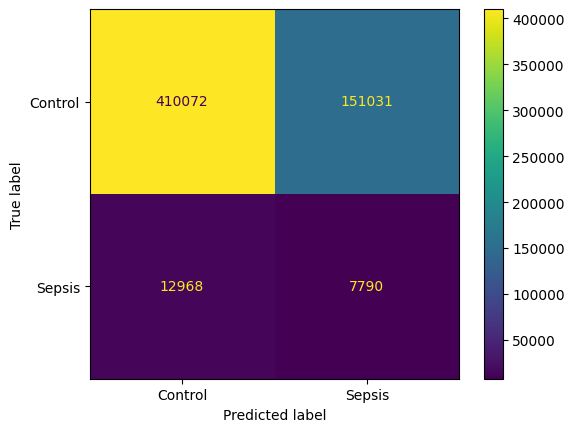

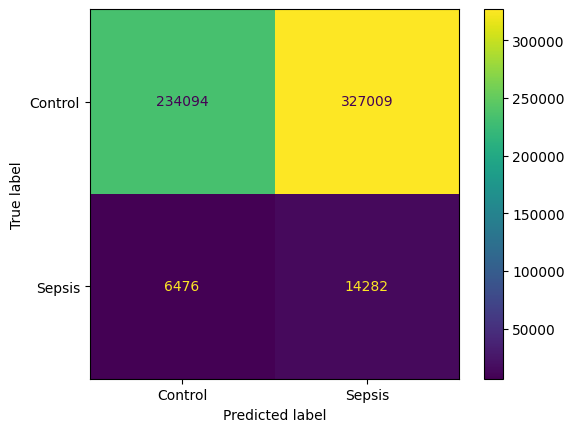

In [16]:
modelWrapper = ModelWrapper()
modelWrapper.train()